# 邻域粒K均值 - iris数据集（feature=4，categories=3）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture

### 曼哈顿距离

In [2]:
def manhattan_distance(v, U):
    return np.abs(U - v)

### 粒化

In [3]:
def granulate(s, parameter_n):
    n, m = s.shape
    granule_n = np.zeros((n, m), dtype=np.int8)
    for j in range(m):
        for i in range(n):
            if(s[i][j] > parameter_n):
                granule_n[i][j] = 0
            else:
                granule_n[i][j] = 1
    return granule_n

### 初始化簇划分

In [4]:
def init_centroids(X, k):
    n, n, m = X.shape
    centroids = np.zeros((k, n, m), dtype=np.int8)
    idx = np.random.randint(0, n, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

### 粒向量相对距离

In [5]:
def granular_vectors_distance1(G_x, G_y):
    new_vector = G_x ^ G_y
    new_vector2 = G_x | G_y
    n, m = new_vector.shape
    a = np.sum(new_vector, axis=0)
    b = np.sum(new_vector2, axis=0)
    c = a / b
    res = np.sum(c) / m
    return res

### 粒向量绝对距离

In [6]:
def granular_vectors_distance2(G_x, G_y):
    new_vector = G_x ^ G_y
    n, m = new_vector.shape
    return (np.sum(new_vector)) / (m * n)

### 划分样本到所对应的类别

In [7]:
def find_closest_centroids(X, centroids, granular_vectors_distance):
    n = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(n, dtype=np.int8)
    
    for i in range(n):
        min_dist = 1000000
        for j in range(k):
            dist = granular_vectors_distance(X[i,:], centroids[j,:])
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

### 计算粒质心

In [8]:
def compute_centroids(X, idx, k, centroids):
    n, n, m = X.shape
    new_centroids = np.zeros((k, n, m), dtype=np.int8)
    
    d = 0
    flag = False
    for i in range(k):
        indices = np.where(idx == i)
        indices = indices[0]
        if(len(indices) != 0):
            new_centroids[i,:] = np.around( np.sum( X[indices,:],axis=0 ) / len(indices) )
            #检查粒质心
            if((new_centroids[i,:] == centroids[i,:]).all()):
                d+=1
        else:
            new_centroids[i,:] = centroids[i,:]
    
    if(d == k):
        flag = True
    
    return new_centroids, flag

### 邻域粒K均值算法

In [9]:
def run_k_means(X, k, parameter_n, N, gvd):
    n, m = X.shape
    idx = np.zeros(n, dtype=np.int8)
    
    #粒化
    GT = np.zeros((n, n, m), dtype=np.int8)
    for i in range(n):
        GT[i] = granulate(manhattan_distance(X[i], X), parameter_n)
        
    #初始化粒质心
    centroids = init_centroids(GT, k)
    
    #迭代
    for i in range(N):
        idx = find_closest_centroids(GT, centroids, gvd)
        centroids, flag = compute_centroids(GT, idx, k, centroids)
        if(flag):
            break
    
    return idx, centroids

### 归一化

In [10]:
def normalization(data):
    _range = np.max(data, axis=0) - np.min(data, axis=0)
    return (data - np.min(data, axis=0)) / _range

### 导入数据

In [11]:
data = pd.read_csv('./iris.data', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 数据预处理

In [12]:
data1 = np.array(data)[:, :-1]
data1

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
data_y = np.array(data)[:, -1]
y = np.zeros(150, dtype=np.int8)
for k in (np.where(data_y == 'Iris-setosa')):
    y[k] = 1
for k in (np.where(data_y == 'Iris-versicolor')):
    y[k] = 2
for k in (np.where(data_y == 'Iris-virginica')):
    y[k] = 3
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int8)

In [14]:
data2 = normalization(data1)
data2

array([[0.22222222222222213, 0.6249999999999999, 0.06779661016949151,
        0.04166666666666667],
       [0.1666666666666668, 0.41666666666666663, 0.06779661016949151,
        0.04166666666666667],
       [0.11111111111111119, 0.5, 0.05084745762711865,
        0.04166666666666667],
       [0.08333333333333327, 0.4583333333333333, 0.0847457627118644,
        0.04166666666666667],
       [0.19444444444444448, 0.6666666666666666, 0.06779661016949151,
        0.04166666666666667],
       [0.30555555555555564, 0.7916666666666665, 0.11864406779661016,
        0.12500000000000003],
       [0.08333333333333327, 0.5833333333333333, 0.06779661016949151,
        0.08333333333333333],
       [0.19444444444444448, 0.5833333333333333, 0.0847457627118644,
        0.04166666666666667],
       [0.027777777777777922, 0.3749999999999999, 0.06779661016949151,
        0.04166666666666667],
       [0.1666666666666668, 0.4583333333333333, 0.0847457627118644, 0.0],
       [0.30555555555555564, 0.70833333333

### 精准度(Purity)计算

In [15]:
def accuracy(labels_true, labels_pred):
    clusters = np.unique(labels_pred)
    labels_true = np.reshape(labels_true, (-1, 1))
    labels_pred = np.reshape(labels_pred, (-1, 1))
    count = []
    for c in clusters:
        idx = np.where(labels_pred == c)[0]
        labels_tmp = labels_true[idx, :].reshape(-1)
        count.append(np.bincount(labels_tmp).max())
    return np.sum(count) / labels_true.shape[0]

### 优化

In [16]:
def optimization(X, categories, parameter_n, N, y, gvd):
    len_p = len(parameter_n)
    len_y = len(y)
    
    score = np.zeros((len_p, 3))
    index = np.zeros((len_p, len_y))
    
    for t in range(len_p):
        ave_score = 0
        for n in range(10):
            label, _ = run_k_means(X, categories, parameter_n[t], N, gvd)
            s = accuracy(y, label)
            ave_score = ave_score + s
            if(s > score[t][1]):
                score[t][1] = s
                index[t] = label
        score[t][2] = ave_score / 10
                
    for i in range(len_p):
        score[i][0] = parameter_n[i]
     
    max_index = np.argmax(score[:, 1])
    return index[max_index], score[:, 1], score[:, 2]

### 测试

In [17]:
run_k_means(data2, 3, 0.5, 10, granular_vectors_distance1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8),
 array([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         ...,
         [1, 1, 0, 0],
         [1, 1, 0, 0],
         [1, 1, 0, 0]],
 
        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         ...,
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],
 
        [[1, 1, 0, 0],
         [1, 1, 0, 0],
         [1, 1, 0, 0],
         ...,
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]], dtype=int8))

### 运行

In [18]:
gra1_label, gra1_score, gra1_ave_score = optimization(data2, 3, np.arange(0, 1, 0.05), 50, y, granular_vectors_distance1)

In [19]:
gra2_label, gra2_score, gra2_ave_score = optimization(data2, 3, np.arange(0, 1, 0.05), 50, y, granular_vectors_distance2)

### 传统K均值算法

In [21]:
km_label = KMeans(n_clusters=3).fit_predict(data2)
km_score = accuracy(y, km_label)

### 数据可视化

In [22]:
X = data1
tsne = TSNE(n_components=2)
tsne.fit_transform(X)
tsne.embedding_

array([[-23.22294   ,  13.944164  ],
       [-20.634302  ,  15.048     ],
       [-20.501192  ,  13.795921  ],
       [-20.184765  ,  14.094126  ],
       [-23.219269  ,  13.5027895 ],
       [-25.137333  ,  13.487439  ],
       [-20.748098  ,  13.206219  ],
       [-22.489635  ,  14.1049185 ],
       [-19.400133  ,  14.2123995 ],
       [-21.089619  ,  14.710886  ],
       [-24.751366  ,  14.171347  ],
       [-21.739292  ,  13.670811  ],
       [-20.332872  ,  14.751037  ],
       [-19.1965    ,  13.632421  ],
       [-26.054588  ,  14.1038    ],
       [-26.177307  ,  13.530915  ],
       [-25.322216  ,  13.840756  ],
       [-23.280777  ,  14.043221  ],
       [-25.557827  ,  14.3655615 ],
       [-24.239922  ,  13.404274  ],
       [-24.189499  ,  14.986805  ],
       [-23.96921   ,  13.6014    ],
       [-20.66137   ,  12.437481  ],
       [-22.90623   ,  15.311587  ],
       [-21.862595  ,  13.121198  ],
       [-21.103497  ,  15.32443   ],
       [-22.742733  ,  14.7444105 ],
 

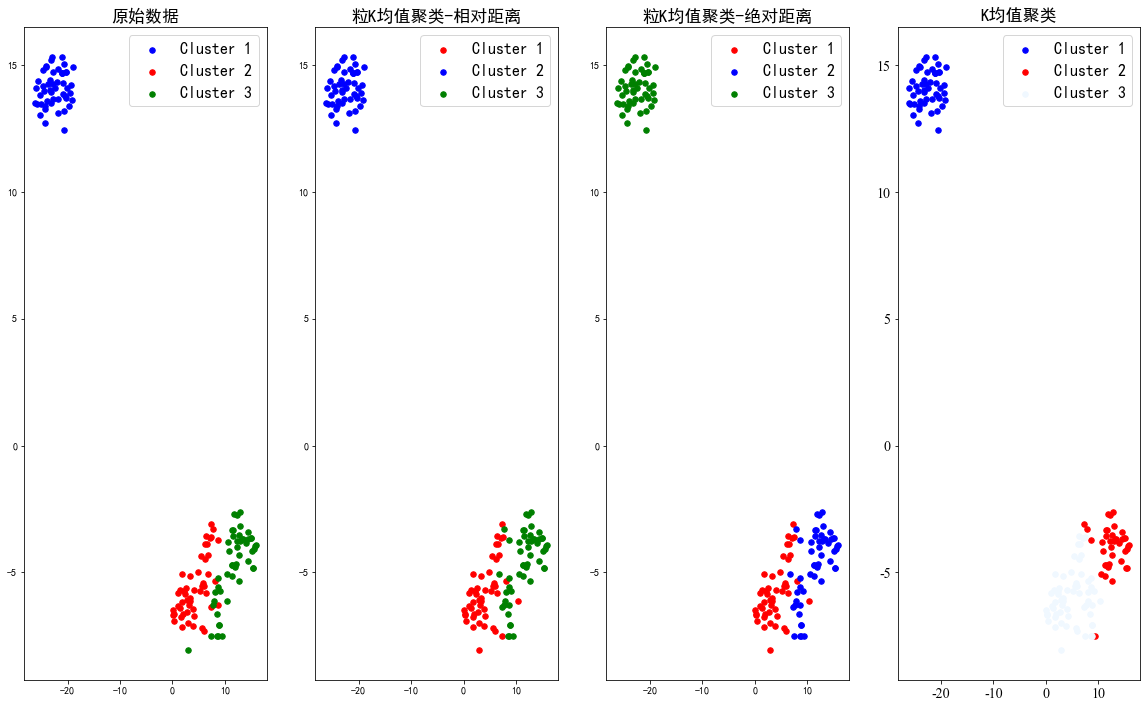

In [24]:
fig, (ax, ax1, ax2, ax3)  = plt.subplots(1, 4, figsize=(20,12))

cluster1 = tsne.embedding_[(np.where(1 == y)[0]), :]
cluster2 = tsne.embedding_[(np.where(2 == y)[0]), :]
cluster3 = tsne.embedding_[(np.where(3 == y)[0]), :]

ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='b', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='r', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='g', label='Cluster 3')
ax.set_title('原始数据',fontdict={'fontsize':'17'})
ax.legend(prop={ 'size'   : 16})


cluster1 = tsne.embedding_[(np.where(1 == gra1_label)[0]), :]
cluster2 = tsne.embedding_[(np.where(2 == gra1_label)[0]), :]
cluster3 = tsne.embedding_[(np.where(0 == gra1_label)[0]), :]

ax1.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax1.scatter(cluster2[:,0], cluster2[:,1], s=30, color='b', label='Cluster 2')
ax1.scatter(cluster3[:,0], cluster3[:,1], s=30, color='g', label='Cluster 3')
ax1.set_title('粒K均值聚类-相对距离',fontdict={'fontsize':'17'})
ax1.legend(prop={ 'size'   : 16})


cluster1 = tsne.embedding_[(np.where(1 == gra2_label)[0]), :]
cluster2 = tsne.embedding_[(np.where(2 == gra2_label)[0]), :]
cluster3 = tsne.embedding_[(np.where(0 == gra2_label)[0]), :]

ax2.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax2.scatter(cluster2[:,0], cluster2[:,1], s=30, color='b', label='Cluster 2')
ax2.scatter(cluster3[:,0], cluster3[:,1], s=30, color='g', label='Cluster 3')
ax2.set_title('粒K均值聚类-绝对距离',fontdict={'fontsize':'17'})
ax2.legend(prop={ 'size'   : 16})


cluster1 = tsne.embedding_[(np.where(1 == km_label)[0]), :]
cluster2 = tsne.embedding_[(np.where(2 == km_label)[0]), :]
cluster3 = tsne.embedding_[(np.where(0 == km_label)[0]), :]

ax3.scatter(cluster1[:,0], cluster1[:,1], s=30, color='b', label='Cluster 1')
ax3.scatter(cluster2[:,0], cluster2[:,1], s=30, color='r', label='Cluster 2')
ax3.scatter(cluster3[:,0], cluster3[:,1], s=30, color='#F0F8FF', label='Cluster 3')
ax3.set_title('K均值聚类',fontdict={'fontsize':'17'})
ax3.legend(prop={ 'size'   : 16})

plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### 领域参数影响

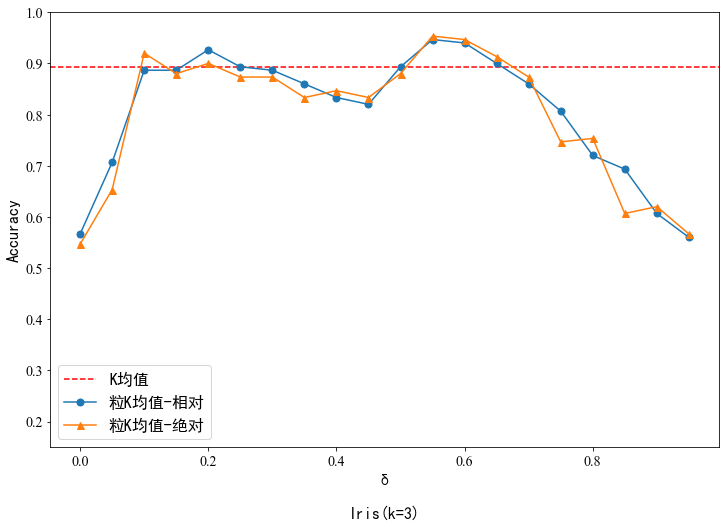

In [22]:
plt.figure(figsize=(12, 8))
plt.axhline(y=max_score, linestyle='--', color='r', label='K均值')
plt.plot(np.arange(0, 1, 0.05),gra1_score, marker='o',markersize=7, label='粒K均值-相对')
plt.plot(np.arange(0, 1, 0.05),gra2_score, marker='^',markersize=7, label='粒K均值-绝对')
plt.xlabel('δ\n\nIris(k=3)',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend(prop={ 'size'   : 16})

plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

plt.ylim(0.15, 1)
plt.show()

### 算法比较

In [68]:
ms_max_score = 0
ms_ave_score = 0
for t in range(10):
    ms_score = accuracy(y, MeanShift(bandwidth=0.85).fit_predict(data1))
    ms_ave_score += ms_score
    if(ms_score > ms_max_score):
        ms_max_score = ms_score
ms_ave_score /= 10

In [69]:
gm_max_score = 0
gm_ave_score = 0
for t in range(10):
    gm_score = accuracy(y, GaussianMixture(n_components=3).fit_predict(data1))
    gm_ave_score += gm_score
    if(gm_score > gm_max_score):
        gm_max_score = gm_score
gm_ave_score/= 10

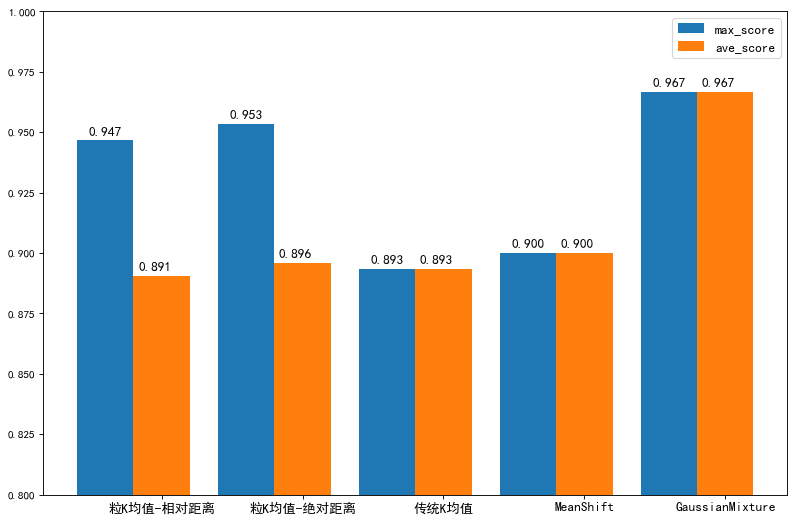

In [116]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt_max_score = [max(gra1_score), max(gra2_score), max_score, ms_max_score, gm_max_score]
plt_ave_score = [max(gra1_ave_score), max(gra2_ave_score), ave_score, ms_ave_score, gm_ave_score]

labels = ['粒K均值-相对距离', '粒K均值-绝对距离', '传统K均值', 'MeanShift', 'GaussianMixture']

fig,ax = plt.subplots(figsize=(12,8),dpi=80)
width_1 = 0.4

ax.bar(np.arange(len(plt_max_score)),plt_max_score,width=width_1,tick_label=labels,label = "max_score")

ax.bar(np.arange(len(plt_ave_score))+width_1,plt_ave_score,width=width_1,tick_label=labels,label="ave_score")

for max_x,max_y in enumerate(plt_max_score):
    plt.text(max_x, max_y+0.002, '%.3f'%max_y, ha='center', fontsize=12)

for ave_x,ave_y in enumerate(plt_ave_score):
    plt.text(ave_x+0.35, ave_y+0.002, '%.3f'%ave_y, ha='center', fontsize=12)

plt.xticks(size = 12)
ax.legend(loc = 0,prop={ 'size'   : 12})
plt.ylim(0.8,1)
plt.show()